<img src="https://www.cct.ie/wp-content/themes/hdcct/img/atoms/logo.jpg" alt="CCT Logo" width="400" style="float: left; margin-right: 10px;">


<h1>Table of Contents<span class="tocSkip"><span></h1>

1. [Loading Libraries] <a href="#Loading Libraries">Go to Loading Libraries</a>

2. [ Data Exploration] <a href="#Data Exploration">Go to  Data Exploration</a>

3. [Time Series Analysis]<a href="#Time Series Analysis">Go to Time Series Analysis</a>

4. [The Augmented Dickey-Fuller Test]<a href="#The Augmented Dickey-Fuller Test">Go to The Augmented Dickey-Fuller Test</a>

5. [Arima Model]<a href="#Arima Model">Go to Arima Model</a>

6. [Changing Model.Predict() to Model.Forecast()] <a href="#Changing Model.Predict() to Model.Forecast()">Changing Model.Predict() to Model.Forecast()</a>

7. [Text Analytic] <a href="#Text Analytic">Go to Text Analytic</a>

    7.1 [Text Cleaning and Preprocessing]<a href="#Text Cleaning and Preprocessing">Go to Text Cleaning and Preprocessing</a>

    7.2 [EDA For Data Distribution]<a href="#EDA For Data Distribution">Go to EDA For Data Distribution</a>

    7.3 [Feature Extraction]<a href="#Feature Extraction">Go to Feature Extraction</a>

8.[LDA model]<a href="#LDA model">Go to LDA model</a>

9.[LDAvis_Prepared]<a href="#LDAvis_Prepared">Go to LDAvis_Prepared</a>

10.[Data Visualisation] <a href="#Data Visualisation">Go to Data Visualisation</a>

11.[Dash Board] <a href="#Dash Board">Go to Dash Board</a>

12.[Conclusion] <a href="#Conclusion">Go to Conclusion</a>

13.[References]<a href="#References">Go to References</a>


<h1 style="font-size: 20px;">1. Loading Libraries</h1> <a id="Loading Libraries"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import altair as alt
import pandas as pd
import numpy as np
import panel as pn
import seaborn as sns

import plotly.express as px
from dash import dcc, html, Input, Output
from jupyter_dash import JupyterDash
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import sklearn.preprocessing as preproc
from sklearn import preprocessing 
alt.data_transformers.enable("vegafusion")
import altair as alt
from sklearn import linear_model


import sklearn.feature_extraction.text as sk_text
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from spellchecker import SpellChecker
from statsmodels.tsa.seasonal import seasonal_decompose
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()
import pickle 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pmdarima as pm
import sklearn.feature_extraction.text as sk_txt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas  
from mpl_toolkits.mplot3d import axes3d
import chardet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tulif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tulif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("elon_musk_tweets.csv")
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  
0  Twitter for iPhone       335       6542       False  
1  Twitter for iPhone      1451      30753       False  
2  Twitter for iPhone      1284      28610       False  
3  Twitter for iPhone       131       3640       False  
4  Twitter for iPhone      1191      23790       False

In [3]:
#
df.tail(5)

id  user_name user_location user_description  \
5899  1665143503108677634  Elon Musk           NaN              NaN   
5900  1665139144425631747  Elon Musk           NaN              NaN   
5901  1665137204782419968  Elon Musk           NaN              NaN   
5902  1665131126900285445  Elon Musk           NaN              NaN   
5903  1665121551652474880  Elon Musk           NaN              NaN   

                   user_created  user_followers  user_friends  \
5899  2009-06-02 20:12:29+00:00       143325985           330   
5900  2009-06-02 20:12:29+00:00       143325985           330   
5901  2009-06-02 20:12:29+00:00       143325985           330   
5902  2009-06-02 20:12:29+00:00       143325985           330   
5903  2009-06-02 20:12:29+00:00       143325985           330   

      user_favourites  user_verified                       date  \
5899            25655          False  2023-06-03 23:48:42+00:00   
5900            25655          False  2023-06-03 23:31:23+00:00   
5901            25655          False  2023-06-03 23:23:41+00:00   
5902            25655          False  2023-06-03 22:59:31+00:00   
5903            25655          False  2023-06-03 22:21:29+00:00   

                                                   text hashtags  \
5899                     @JonErlichman He’s not wrong …      NaN   
5900  @alifarhat79 Guys, I think I maybe took too mu...      NaN   
5901                                      @sriramk Cool      NaN   
5902               @cb_doge Time to complete the circle      NaN   
5903         @Jason Late stage civilization complacency      NaN   

                  source  retweets  favorites  is_retweet  
5899  Twitter for iPhone       361       4791       False  
5900  Twitter for iPhone      1609      61964       False  
5901  Twitter for iPhone        46        879       False  
5902  Twitter for iPhone       898      12467       False  
5903  Twitter for iPhone      1997      38113       False

<h1 style="font-size: 20px;">2. Data Exploration</h1> <a id="Data Exploration"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5904 non-null   int64 
 1   user_name         5904 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1422 non-null   object
 4   user_created      5904 non-null   object
 5   user_followers    5904 non-null   int64 
 6   user_friends      5904 non-null   int64 
 7   user_favourites   5904 non-null   int64 
 8   user_verified     5904 non-null   bool  
 9   date              5904 non-null   object
 10  text              5904 non-null   object
 11  hashtags          2 non-null      object
 12  source            5904 non-null   object
 13  retweets          5904 non-null   int64 
 14  favorites         5904 non-null   int64 
 15  is_retweet        5904 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 657.4+ KB


In [5]:
# of non null value
df.count

<bound method DataFrame.count of                        id  user_name user_location           user_description  \
0     1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1     1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2     1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3     1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4     1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   
...                   ...        ...           ...                        ...   
5899  1665143503108677634  Elon Musk           NaN                        NaN   
5900  1665139144425631747  Elon Musk           NaN                        NaN   
5901  1665137204782419968  Elon Musk           NaN                        NaN   
5902  1665131126900285445  Elon Musk           NaN                        NaN   
5903  1665121551652474880  Elon Musk           NaN                        Na

In [6]:
#total count of non null value in dataset
df.count().sum()

79226

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
user_name              0
user_location       4854
user_description    4482
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5902
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [63]:
df_cleaned = df.dropna(axis=1)
df.dropna(axis=1, inplace=True)
df_cleaned = df.dropna(axis=1, thresh=len(df) - 100)

In [65]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, user_name, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, source, retweets, favorites, is_retweet]
Index: []


<h1 style="font-size: 20px;">3. Time Series Analysis</h1> <a id="Time Series Analysis"></a>

Discuss the concept and application of Time Series Analysis using Machine Learning Modeling by providing a real-world data set.

In [67]:
#fixing the  ParserError due to incorrect formating


with open('elon_musk_tweets.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']


try_encodings = ['utf-8', 'latin-1']

for try_encoding in try_encodings:
    try:
       
        with open('elon_musk_tweets.csv', 'rb') as file:
            content = file.read().decode(try_encoding)

      
        print(f"Successfully decoded using encoding: {try_encoding}")
        print(content[:500])  
        break  #
    except UnicodeDecodeError:
        print(f"Failed to decode using encoding: {try_encoding}")



Successfully decoded using encoding: utf-8
id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1544379368478212100,Elon Musk,,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitably off kilter &amp; washed out – a little troubling esthetically &amp; arguably a bit corpo,,Twitter for iPhone,335,6542,False
1544377493263720450,E


Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


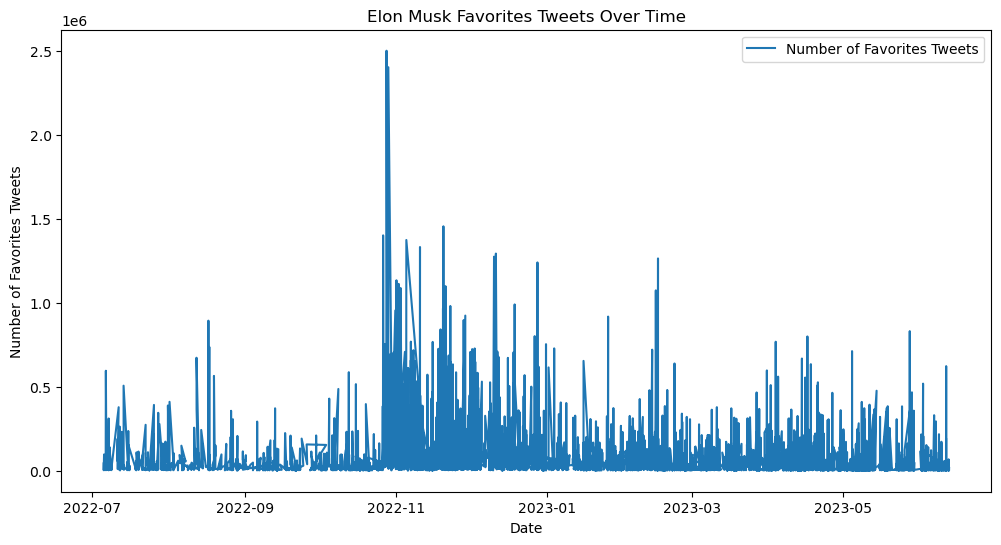

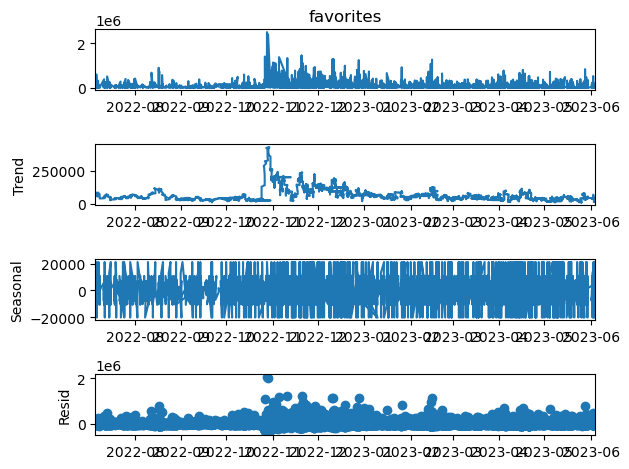

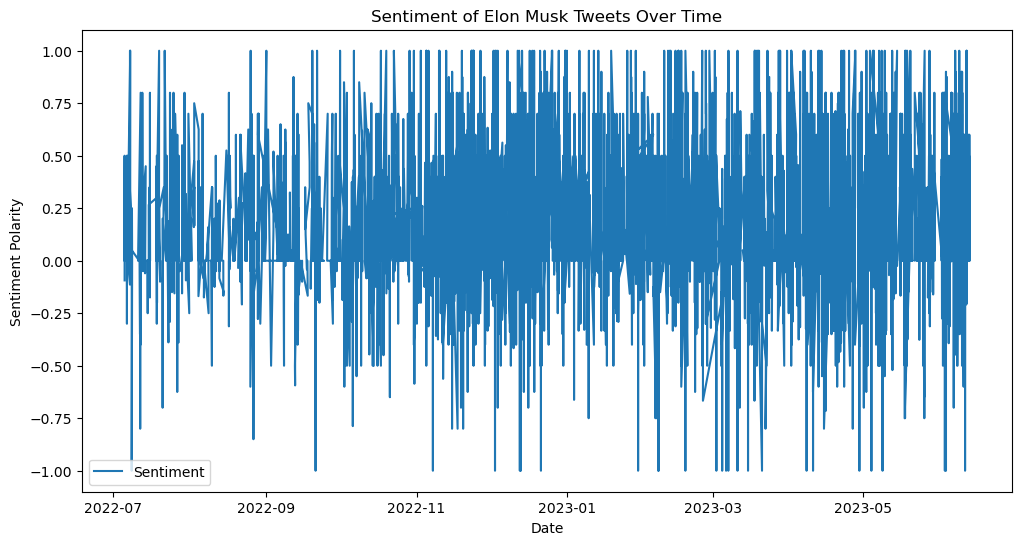

In [68]:
#Time Series

url = "https://www.kaggle.com/code/vencerlanz09/elon-musk-tweets-eda-and-sentiment-analysis/notebook#%E2%9C%92%EF%B8%8FInitialization"

df = pd.read_csv('elon_musk_tweets.csv', encoding='utf-8', delimiter=',')

print(df.columns)


if 'date' in df.columns:
    
    df['date'] = pd.to_datetime(df['date'])

  
    df.set_index('date', inplace=True)

   
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['favorites'], label='Number of Favorites Tweets')
    plt.title('Elon Musk Favorites Tweets Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Favorites Tweets')
    plt.legend()
    plt.show()

    # Decompose the time series into trend, seasonal, and residual components
    result = seasonal_decompose(df['favorites'], model='additive', period=30)  
    result.plot()
    plt.show()

    # Sentiment analysis of the tweets
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Visualize sentiment over time
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['sentiment'], label='Sentiment')
    plt.title('Sentiment of Elon Musk Tweets Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Polarity')
    plt.legend()
    plt.show()

else:
    print("Error: 'date' column not found in the dataset.")


In [69]:
print(df.columns)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet',
       'sentiment'],
      dtype='object')


In [70]:
# Reset the index to make 'date' a regular column (Error: 'date' column not found in the dataset.)
df.reset_index(inplace=True)

In [71]:
#Convert to datetime
df["date"] = pd.to_datetime(df["date"])

In [72]:
df = df.groupby([df["date"].dt.date, "user_name"])[["retweets", "favorites"]].mean().astype(int)
df.head()

retweets  favorites
date       user_name                     
2022-07-05 Elon Musk      1476      30261
2022-07-06 Elon Musk      6888      90640
2022-07-07 Elon Musk      5213      75226
2022-07-08 Elon Musk      1718      20089
2022-07-11 Elon Musk      5284      81158

In [73]:
#add index
df = df.reset_index()
df.head()

date  user_name  retweets  favorites
0  2022-07-05  Elon Musk      1476      30261
1  2022-07-06  Elon Musk      6888      90640
2  2022-07-07  Elon Musk      5213      75226
3  2022-07-08  Elon Musk      1718      20089
4  2022-07-11  Elon Musk      5284      81158

<Axes: xlabel='date'>

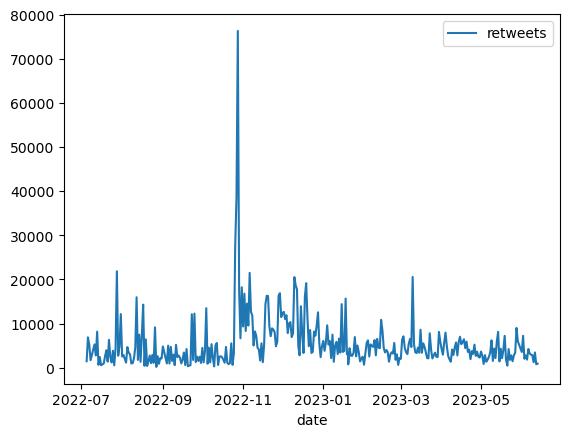

In [74]:
df.plot(x="date", y="retweets")

<h1 style="font-size: 20px;">4. The Augmented Dickey-Fuller Test</h1> <a id="The Augmented Dickey-Fuller Test"></a>

What is the purpose of The Augmented Dickey-Fuller Test in time series?

In [75]:
df = pd.read_csv("elon_musk_tweets.csv", parse_dates=['date'])

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

result = adfuller(df['date'].values)

# Extract and print the test statistic and p-value
test_statistic, p_value, _, _, _, _ = result
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

if p_value <= 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")



Test Statistic: 13.066177877626313
P-value: 1.0
Fail to reject the null hypothesis: The time series is non-stationary.


In [76]:
adfuller(df["favorites"])

(-7.405366759734033,
 7.368981302595311e-11,
 32,
 5871,
 {'1%': -3.431464318079141,
  '5%': -2.862032424175353,
  '10%': -2.567032115219454},
 154732.6966844014)

In [77]:
df.shape

(5904, 16)

In [78]:
split = int(df.shape[0] * 0.8)

In [79]:
split

4723

In [80]:
df_train = df[:split]
df_test = df[split:]

In [81]:
df_train.shape

(4723, 16)

In [82]:
df_train.tail()

id  user_name user_location user_description  \
4718  1650731557164818437  Elon Musk     Trøllheim          nothing   
4719  1650730171836559360  Elon Musk     Trøllheim          nothing   
4720  1650729691043573761  Elon Musk     Trøllheim          nothing   
4721  1650727921609322496  Elon Musk     Trøllheim          nothing   
4722  1650717222141153280  Elon Musk     Trøllheim          nothing   

                   user_created  user_followers  user_friends  \
4718  2009-06-02 20:12:29+00:00       138012717           266   
4719  2009-06-02 20:12:29+00:00       138012717           266   
4720  2009-06-02 20:12:29+00:00       138012717           266   
4721  2009-06-02 20:12:29+00:00       138012717           266   
4722  2009-06-02 20:12:29+00:00       138012717           266   

      user_favourites  user_verified                      date  \
4718            22452          False 2023-04-25 05:20:46+00:00   
4719            22452          False 2023-04-25 05:15:16+00:00   
4720            22452          False 2023-04-25 05:13:22+00:00   
4721            22452          False 2023-04-25 05:06:20+00:00   
4722            22452          False 2023-04-25 04:23:49+00:00   

                                                   text hashtags  \
4718              Verified accounts are now prioritized      NaN   
4719               @johnhackerla That meme rings a bell      NaN   
4720  Sometimes, when you learn about something, you...      NaN   
4721  @farzyness It’s been a while since had to inte...      NaN   
4722  @Not_the_Bee I agree with assisted suicide if ...      NaN   

                  source  retweets  favorites  is_retweet  
4718  Twitter for iPhone     20285     306265       False  
4719  Twitter for iPhone       489       7800       False  
4720  Twitter for iPhone     11207     112864       False  
4721  Twitter for iPhone       321       4551       False  
4722  Twitter for iPhone      2216      37653       False

In [83]:
adfuller(df_train["favorites"])

(-7.908687565773407,
 4.001992212396679e-12,
 25,
 4697,
 {'1%': -3.4317429907112977,
  '5%': -2.862155542525302,
  '10%': -2.5670976555335967},
 124358.34014311232)

In [84]:
adfuller(df_train["favorites"].diff(1).dropna())

(-19.949774595576642,
 0.0,
 31,
 4690,
 {'1%': -3.4317450709415156,
  '5%': -2.8621564615335138,
  '10%': -2.567098144762026},
 124379.25702028045)

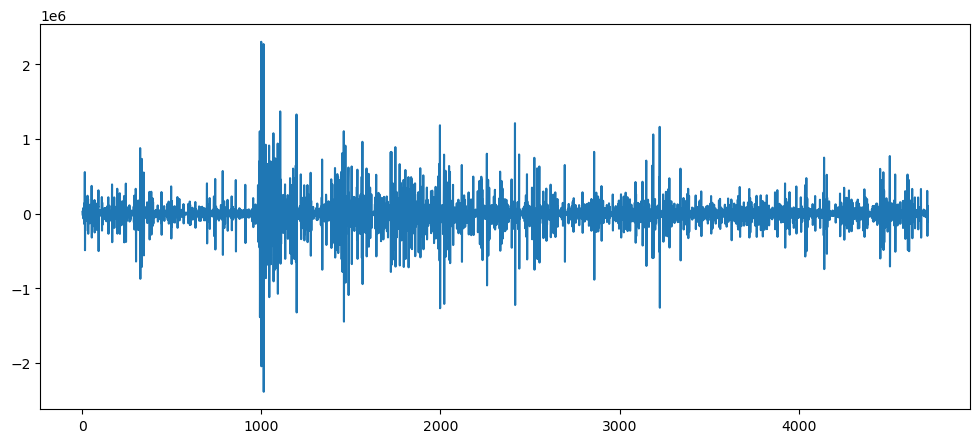

In [85]:
plt.figure(figsize= [12, 5])
plt.plot(df_train["favorites"].diff(1).dropna());

In [86]:
adfuller(df_train["date"])

(13.32400204934439,
 1.0,
 12,
 4710,
 {'1%': -3.4317391438401716,
  '5%': -2.862153843045292,
  '10%': -2.567096750826042},
 311333.3045140515)

In [87]:
adfuller(df_train["date"].diff(1).dropna())

(-26.54420900299233,
 0.0,
 11,
 4710,
 {'1%': -3.4317391438401716,
  '5%': -2.862153843045292,
  '10%': -2.567096750826042},
 311267.13901963306)

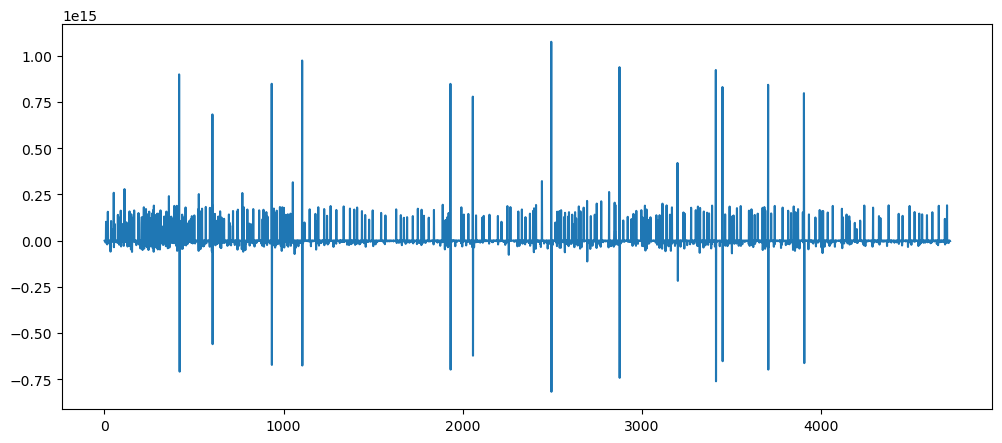

In [88]:
plt.figure(figsize= [12, 5])
plt.plot(df_train["date"].diff(1).dropna());

<h1 style="font-size: 20px;">5. Arima Model</h1> <a id="Arima Model"></a>

Apply an appropriate Box-Jenkins model to the chosen dataset (ARMA, ARIMA, SARIMA etc). Check for the model adequacy

In [62]:
#Arima Model
aicVals = []
for p in range(5):
    for d in range(5):
        for q in range(5):
            print(f"p: {p}, d: {d}, q: {q}")
            
            try:
                
                model = pm.auto_arima(df["favorites"], suppress_warnings=True, seasonal=False, stepwise=True, order=(p, d, q))
                aicVals.append([model.aic(), p, d, q])
            except Exception as e:
                print(f"Error for p={p}, d={d}, q={q}: {e}")

p: 0, d: 0, q: 0
p: 0, d: 0, q: 1
p: 0, d: 0, q: 2
p: 0, d: 0, q: 3
p: 0, d: 0, q: 4
p: 0, d: 1, q: 0
p: 0, d: 1, q: 1
p: 0, d: 1, q: 2
p: 0, d: 1, q: 3
p: 0, d: 1, q: 4
p: 0, d: 2, q: 0
p: 0, d: 2, q: 1
p: 0, d: 2, q: 2
p: 0, d: 2, q: 3
p: 0, d: 2, q: 4
p: 0, d: 3, q: 0
p: 0, d: 3, q: 1
p: 0, d: 3, q: 2
p: 0, d: 3, q: 3
p: 0, d: 3, q: 4
p: 0, d: 4, q: 0
p: 0, d: 4, q: 1
p: 0, d: 4, q: 2
p: 0, d: 4, q: 3
p: 0, d: 4, q: 4
p: 1, d: 0, q: 0
p: 1, d: 0, q: 1
p: 1, d: 0, q: 2
p: 1, d: 0, q: 3
p: 1, d: 0, q: 4
p: 1, d: 1, q: 0
p: 1, d: 1, q: 1
p: 1, d: 1, q: 2
p: 1, d: 1, q: 3
p: 1, d: 1, q: 4
p: 1, d: 2, q: 0
p: 1, d: 2, q: 1
p: 1, d: 2, q: 2
p: 1, d: 2, q: 3
p: 1, d: 2, q: 4
p: 1, d: 3, q: 0
p: 1, d: 3, q: 1
p: 1, d: 3, q: 2
p: 1, d: 3, q: 3
p: 1, d: 3, q: 4
p: 1, d: 4, q: 0
p: 1, d: 4, q: 1
p: 1, d: 4, q: 2
p: 1, d: 4, q: 3
p: 1, d: 4, q: 4
p: 2, d: 0, q: 0
p: 2, d: 0, q: 1
p: 2, d: 0, q: 2
p: 2, d: 0, q: 3
p: 2, d: 0, q: 4
p: 2, d: 1, q: 0
p: 2, d: 1, q: 1
p: 2, d: 1, q: 2
p: 2, d: 1, q:

In [90]:
aicVals.sort()

In [91]:
aicVals

[[155659.01467257412, 0, 0, 0],
 [155659.01467257412, 0, 0, 1],
 [155659.01467257412, 0, 0, 2],
 [155659.01467257412, 0, 0, 3],
 [155659.01467257412, 0, 0, 4],
 [155659.01467257412, 0, 1, 0],
 [155659.01467257412, 0, 1, 1],
 [155659.01467257412, 0, 1, 2],
 [155659.01467257412, 0, 1, 3],
 [155659.01467257412, 0, 1, 4],
 [155659.01467257412, 0, 2, 0],
 [155659.01467257412, 0, 2, 1],
 [155659.01467257412, 0, 2, 2],
 [155659.01467257412, 0, 2, 3],
 [155659.01467257412, 0, 2, 4],
 [155659.01467257412, 0, 3, 0],
 [155659.01467257412, 0, 3, 1],
 [155659.01467257412, 0, 3, 2],
 [155659.01467257412, 0, 3, 3],
 [155659.01467257412, 0, 3, 4],
 [155659.01467257412, 0, 4, 0],
 [155659.01467257412, 0, 4, 1],
 [155659.01467257412, 0, 4, 2],
 [155659.01467257412, 0, 4, 3],
 [155659.01467257412, 0, 4, 4],
 [155659.01467257412, 1, 0, 0],
 [155659.01467257412, 1, 0, 1],
 [155659.01467257412, 1, 0, 2],
 [155659.01467257412, 1, 0, 3],
 [155659.01467257412, 1, 0, 4],
 [155659.01467257412, 1, 1, 0],
 [155659

In [92]:

model = SARIMAX(df_train["favorites"], order=(0, 0, 0), seasonal_order=(0, 0, 1,12)).fit()

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                  favorites   No. Observations:                 4723
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood              -63162.341
Date:                    Sun, 26 Nov 2023   AIC                         126328.682
Time:                            16:09:41   BIC                         126341.602
Sample:                                 0   HQIC                        126333.223
                                   - 4723                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.1941      0.010     19.906      0.000       0.175       0.213
sigma2      2.541e+10   1.87e-13   1.36e+23      0.000    2.54e+10    2.54e+10
===================================================================================
Ljung-Box (L1) (Q):                  15.01   Jarque-Bera (JB):            500024.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             5.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.66e+37. Standard errors may be unstable.
"""

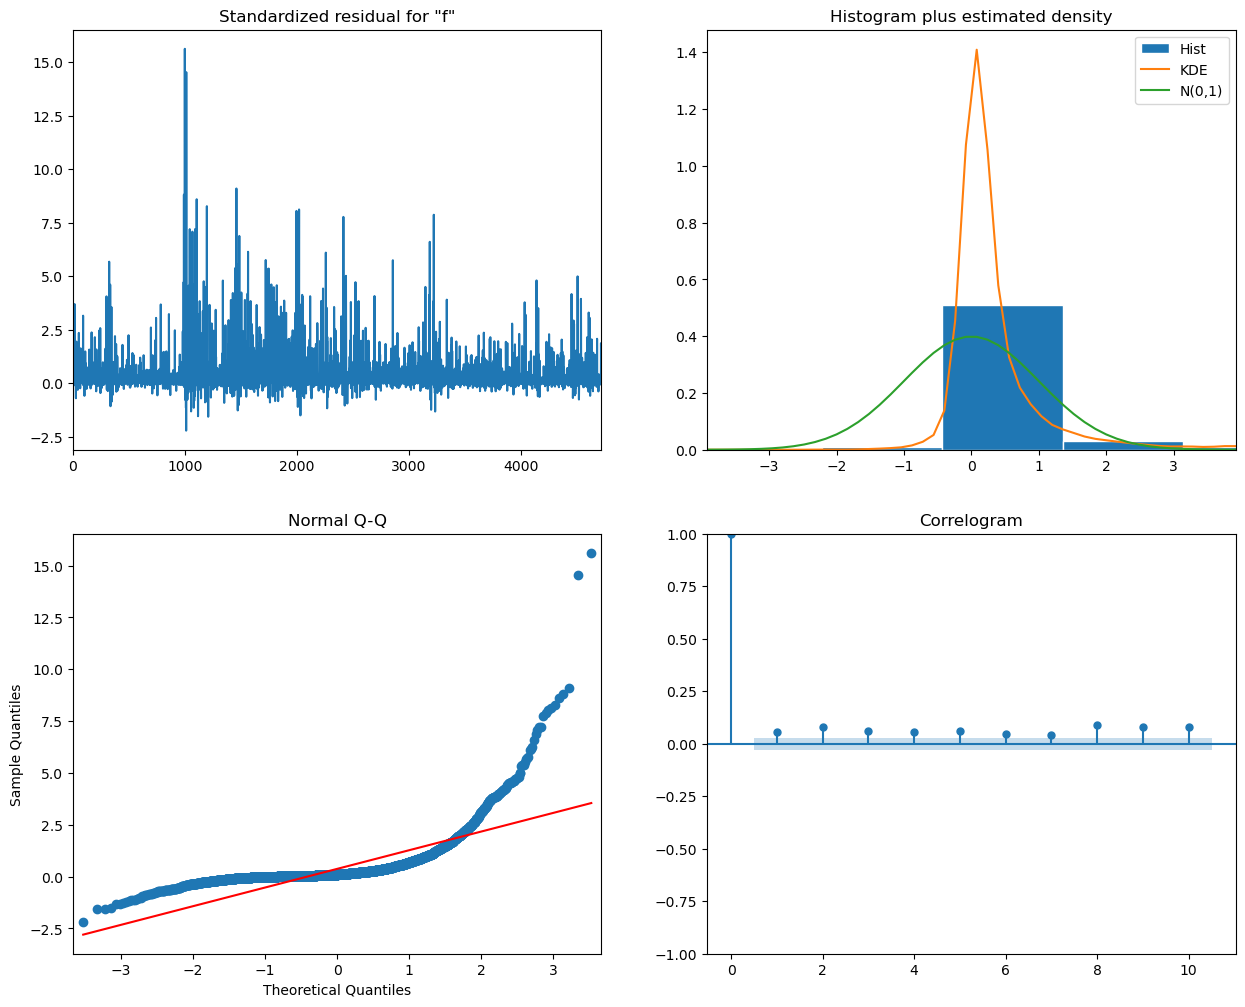

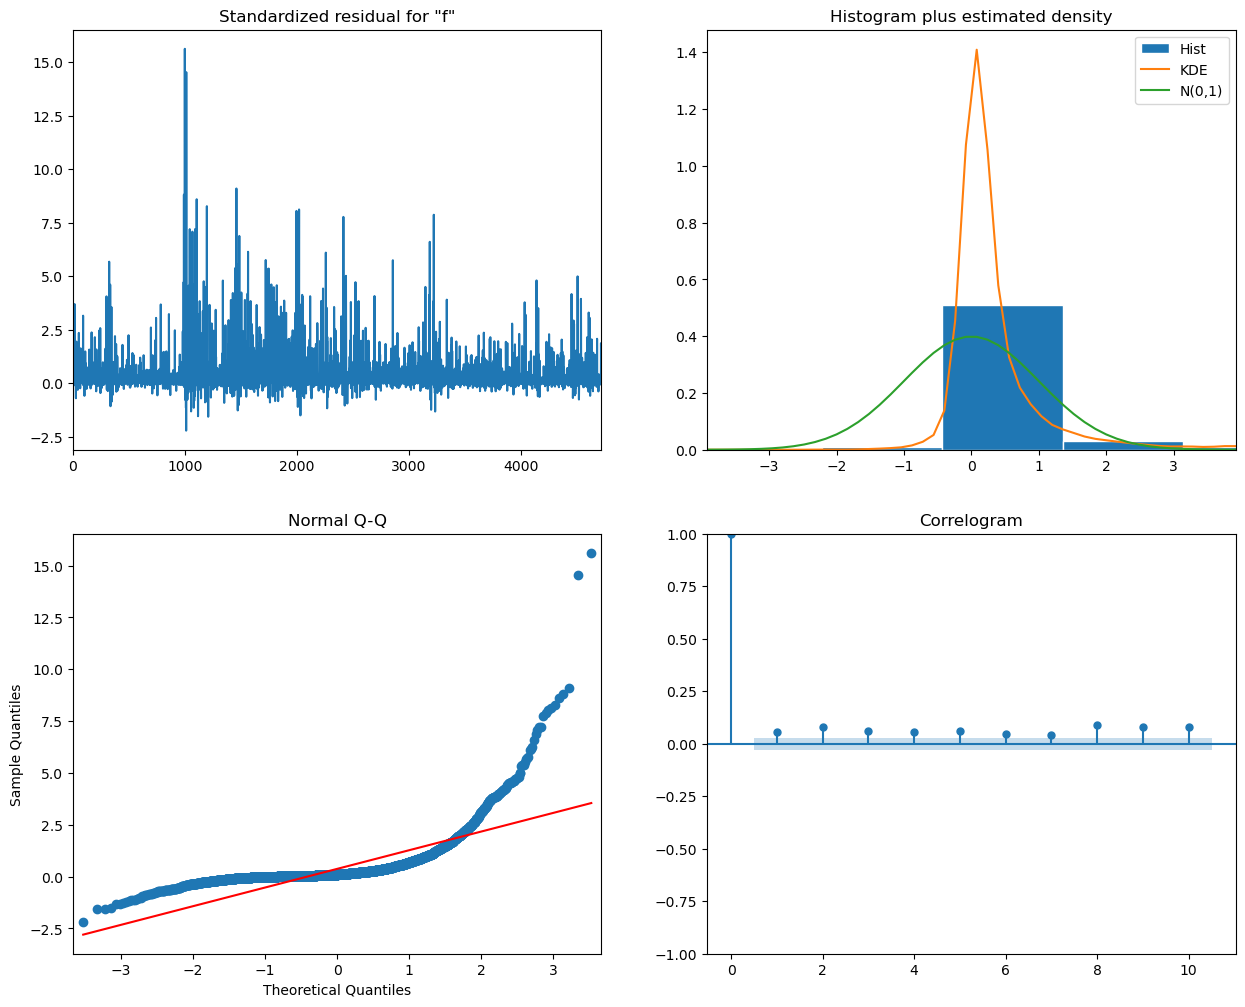

In [94]:
model.plot_diagnostics(figsize=(15, 12))

<h1 style="font-size: 20px;">6. Changing Model.Predict() to Model.Forecast()</h1> <a id="Changing Model.Predict() to Model.Forecast()"></a>

Make one-step-ahead forecasts of the last 10 observations. Determine the forecast errors

In [100]:
pred_time = 20
model
result = model.predict(start=df["favorites"].shape[0]-10)

In [101]:
actual_values = df["favorites"].tail(10)

In [103]:
forecast_errors = result - actual_values

mae = forecast_errors.abs().mean()
mse = (forecast_errors**2).mean()
rmse = np.sqrt(mse)

# Display results
mae, mse, rmse


(15174.0, 230250276.0, 15174.0)

 Make a time series plot of the data, and further calculate and illustrate the sample autocorrelation and partial autocorrelation

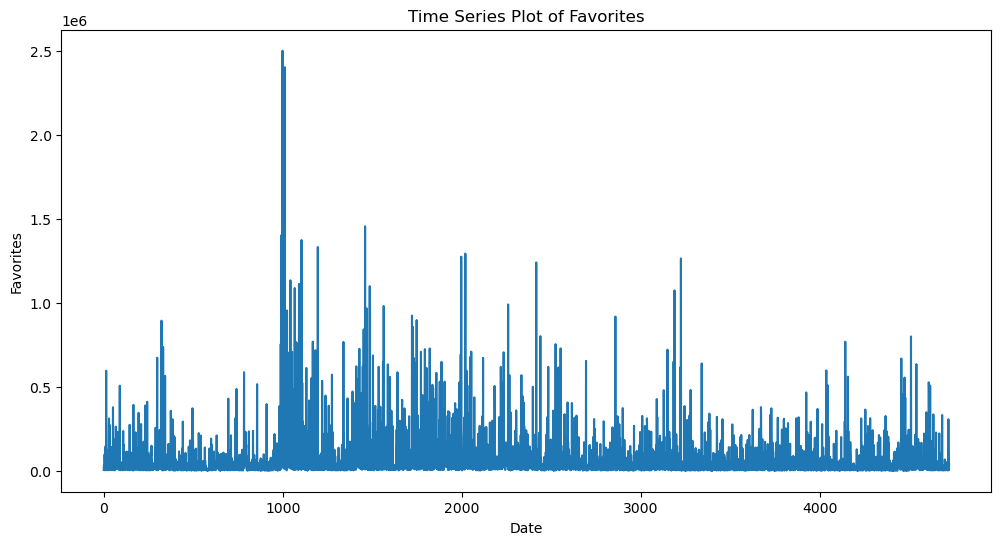

<Figure size 1200x600 with 0 Axes>

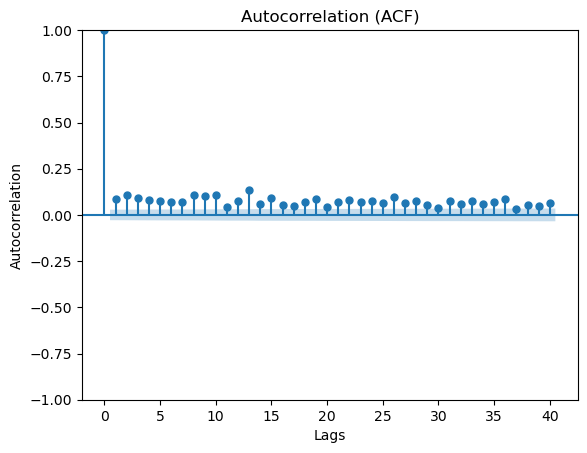

<Figure size 1200x600 with 0 Axes>

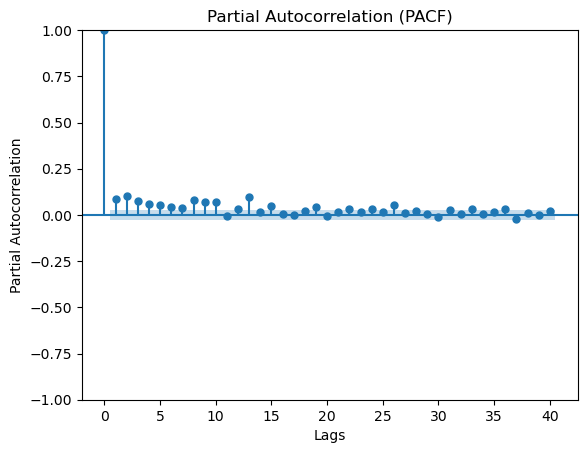

In [114]:
# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(df_train["favorites"])
plt.title("Time Series Plot of Favorites")
plt.xlabel("Date")
plt.ylabel("Favorites")
plt.show()

# Sample Autocorrelation (ACF) plot
plt.figure(figsize=(12, 6))
plot_acf(df_train["favorites"].dropna(), lags=40, alpha=0.05)
plt.title("Autocorrelation (ACF)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

# Partial Autocorrelation (PACF) plot
plt.figure(figsize=(12, 6))
plot_pacf(df_train["favorites"].dropna(), lags=40, alpha=0.05)
plt.title("Partial Autocorrelation (PACF)")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.show()


<h1 style="font-size: 20px;">7. Text Analytic</h1> <a id="Text Analytic"></a>


Discuss the concept and application of Text Analytics (eg text categorisation, topic modeling and document summarisation) using machine learning modeling by providing a real-world data set of social media posts. 

<h1 style="font-size: 15px;">7.1. Text Cleaning and Preprocessing</h1> <a id="Text Cleaning and Preprocessing"></a>

In [115]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [116]:
# Getting our texts in a list to process
texts = df['text'].values.tolist()

In [117]:
def sent_to_words(texts):
    return [word_tokenize(text) for text in texts]

In [118]:
def remove_stopwords(words):
    return [word_tokenize(text) for text in texts]

In [119]:
words = ['word1', 'word2', 'word3', ...]

len(words)

4

In [120]:
words[0]

'word1'

<h1 style="font-size: 15px;">7.2. EDA For Data Distribution</h1> <a id="EDA For Data Distribution"></a>

In [121]:
df['text_lenth'] = df['cleaned_text'].apply(len)
print(df['text_lenth'].describe())

count    5904.000000
mean       40.949018
std        23.314311
min         0.000000
25%        22.000000
50%        35.000000
75%        60.000000
max       129.000000
Name: text_lenth, dtype: float64


<h1 style="font-size: 15px;">7.3. Feature Extraction</h1> <a id="Feature Extraction"></a>

In [122]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

In [123]:
#text analysis
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [124]:
# Make a dictionary of ids for the words
example_text = "This is an example sentence."

# Tokenize the text
tokens = word_tokenize(example_text.lower()) 

words = [tokens]

# Now create the dictionary
id2word = corpora.Dictionary(words)


In [125]:
id2word

In [126]:
# Translates our words into their correspoinding ids
corpus = [id2word.doc2bow(text) for text in words]

In [127]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]

In [128]:
num_topics = 20

<h1 style="font-size: 20px;">8. LDA model</h1> <a id="LDA model"></a>

In [129]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

In [131]:
pprint(lda_model.print_topics())

[(0,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (1,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (2,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (3,
  '0.167*"example" + 0.167*"sentence" + 0.167*"." + 0.167*"is" + 0.167*"this" '
  '+ 0.167*"an"'),
 (4,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (5,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (6,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (7,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (8,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (9,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 

In [132]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

In [133]:
# Optional, saves our visualisation prep
with open("LDA_vis_prep", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

<h1 style="font-size: 20px;">9. LDAvis_Prepared</h1> <a id="LDAvis_Prepared"></a>

In [134]:
#adding more stopword

stop_words.update(['is','sample','this','another','example'])

In [135]:
# Remove punctuation
df['processsed_text'] = df['text'].map(lambda x: re.sub('[,\\.!?]', '', x))
# Convert the titles to lowercase
df['processsed_text'] = df['processsed_text'].map(lambda x: x.lower())

C:\Users\tulif\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


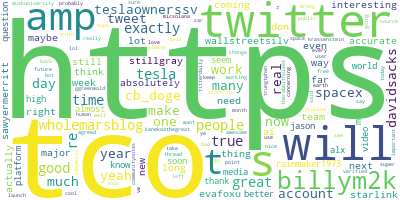

In [136]:
texts = df['processsed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)

wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [137]:
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]
num_topics = 20
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)
with open("LDA_vis_prep_2", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.063635 -0.044879       1        1  12.587464
10    -0.053479  0.000280       2        1   8.091061
9     -0.041502 -0.007272       3        1   6.843405
6     -0.026601 -0.001802       4        1   6.753942
16    -0.043017 -0.021943       5        1   6.191631
2     -0.043509 -0.008075       6        1   6.092268
4     -0.034219  0.016276       7        1   5.809914
5     -0.010732  0.030808       8        1   5.663396
19    -0.036111 -0.008402       9        1   5.404738
13    -0.004154 -0.004163      10        1   5.272614
0     -0.001783  0.006789      11        1   4.222953
8     -0.000703 -0.027393      12        1   4.205263
15    -0.018544  0.030712      13        1   4.126332
17     0.031004  0.043187      14        1   3.536331
11     0.016100  0.018843      15        1   3.216969
1      0.013415  0.037074      16        1   3.204145
14     0.056561  0.027620      17        1   2.763035
12     0.098346  0.062709      18        1   2.422518
18     0.060893 -0.050580      19        1   1.997568
7      0.101671 -0.099790      20        1   1.594453, topic_info=    Term         Freq        Total Category  logprob  loglift
2      @  6418.000000  6418.000000  Default  30.0000  30.0000
62    to  1064.000000  1064.000000  Default  29.0000  29.0000
50    is  1103.000000  1103.000000  Default  28.0000  28.0000
3      a   866.000000   866.000000  Default  27.0000  27.0000
19   the  1365.000000  1365.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
50    is     5.119488  1103.039407  Topic20  -5.4111  -1.2341
342   if     3.805395   166.327586  Topic20  -5.7077   0.3611
19   the     4.516092  1365.997893  Topic20  -5.5365  -1.5734
0      &     3.870754   283.764133  Topic20  -5.6907  -0.1561
1      ;     3.646845   283.789503  Topic20  -5.7503  -0.2157

[1498 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.084577    &
0         2  0.049337    &
0         3  0.045813    &
0         4  0.049337    &
0         5  0.017620    &
...     ...       ...  ...
4902      5  0.672457    🤩
4902     16  0.224152    🤩
9990      7  0.766702    🩸
9991      7  0.766778    🪶
9207      8  0.753279    🫡

[4104 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 11, 10, 7, 17, 3, 5, 6, 20, 14, 1, 9, 16, 18, 12, 2, 15, 13, 19, 8])

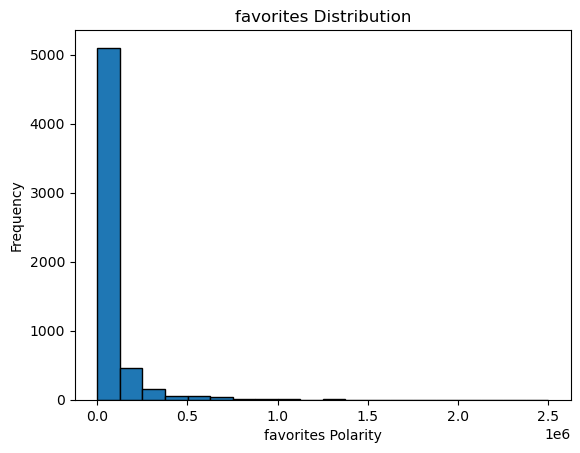

In [138]:
#favorites tweets distribution
plt.hist(df['favorites'], bins=20, edgecolor='black')
plt.title('favorites Distribution')
plt.xlabel('favorites Polarity')
plt.ylabel('Frequency')
plt.show()

In [139]:
len(words)

5904

In [140]:
words[0]

['@',
 'billym2k',
 'i',
 'find',
 'the',
 'gold',
 'toe',
 'sock',
 '–',
 'inevitably',
 'off',
 'kilter',
 '&',
 'amp',
 ';',
 'washed',
 'out',
 '–',
 'a',
 'little',
 'troubling',
 'esthetically',
 '&',
 'amp',
 ';',
 'arguably',
 'a',
 'bit',
 'corpo']

<h1 style="font-size: 20px;">10. Data Visualisation</h1> <a id="Data Visualisation"></a>

In [171]:
#select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [172]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

Series([], dtype: float64)

In [173]:
# Convert object columns to category data type
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Convert int64 columns to float64
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('float64')
    
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes.astype('float64')    
    
print(df.dtypes)

id                  float64
user_name           float64
user_location       float64
user_description    float64
user_created        float64
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified          bool
date                float64
text                float64
hashtags            float64
source              float64
retweets            float64
favorites           float64
is_retweet             bool
dtype: object


In [174]:
X = df.drop('favorites', axis=1)
y = df.favorites

In [175]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
r2 = r2_score(y, y_pred)
r2

0.8124052719658219

In [176]:
def get_regression_line(df):
    lr = linear_model.LinearRegression()
    lr.fit(X, y)
    coef = lr.coef_
    intercept = lr.intercept_

    scatter_plot = alt.Chart(df).mark_circle().encode(
        x='date',
        y='favorites',
        tooltip=['date', 'favorites'])

    line_plot = alt.Chart(pd.DataFrame({'date': [df['date'].min(), df['date'].max()],
                                         'favorites': [df['date'].min() * coef[0] + intercept,
                                                     df['date'].max() * coef[0] + intercept]})).mark_line(
        color='red').encode(
        x='date', y='favorites')

    return scatter_plot + line_plot

# Enable VegaFusion data transformer
alt.data_transformers.enable("vegafusion")


DataTransformerRegistry.enable('vegafusion')

In [177]:
get_regression_line(df)

alt.LayerChart(...)

Horizontal regression line suggest model is not capturing any significant relationship between favorites vs date

In [163]:
#Box Plot
def create_box_plot(df):
    df_long = df.melt(id_vars='date', var_name='key', value_name='value')
    df_long['date'] = df_long['date'].astype(float)
    df_long['value'] = df_long['value'].astype(float)
    
    return alt.Chart(df_long).mark_boxplot().encode(
        x=alt.X('key:N', title='Feature'),
        y=alt.Y('value:Q', title='Value'),
    ).interactive()

create_box_plot(df)


alt.Chart(...)

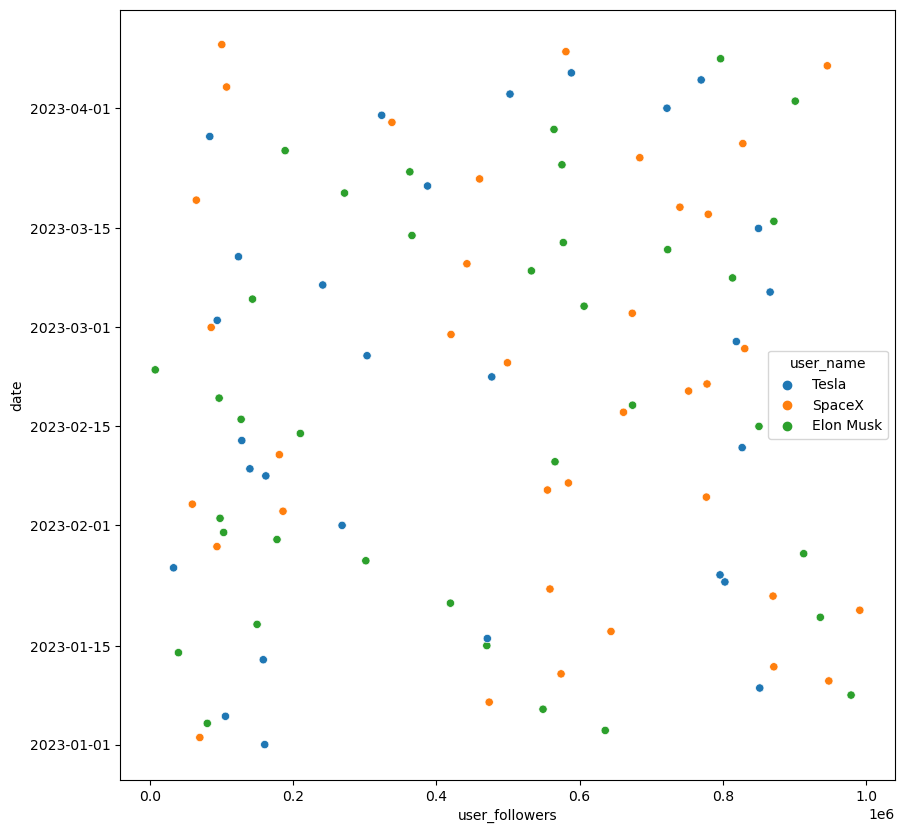

In [178]:
# Scatter plot
elon_musk_tweets = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'user_followers': np.random.randint(0, 1000000, 100),
    'user_name': np.random.choice(['Elon Musk', 'Tesla', 'SpaceX'], 100),
})

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='user_followers', y='date', hue='user_name', data=elon_musk_tweets)
plt.show()


In [165]:
#nan values to numerical
df['favorites'] = pd.to_numeric(df['favorites'], errors='coerce')
df['retweets'] = pd.to_numeric(df['retweets'], errors='coerce')

# Drop rows with null values in 'favorites' or 'retweets'
df = df.dropna(subset=['favorites', 'retweets'])

scatter_plot = alt.Chart(df).mark_circle().encode(
    x='favorites:Q',
    y='retweets:Q',
    color='date:T',
    tooltip=['date:T', 'favorites:Q', 'retweets:Q']
).interactive()

scatter_plot


alt.Chart(...)

In [166]:
scatter_chart = alt.Chart(df).mark_circle().encode(
    x='favorites:Q',
    y='retweets:Q',
    color='user_description:N',
    tooltip=['id','user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','text','hashtags','source','retweets','favorites','is_retweet']
).interactive()

scatter_chart



alt.Chart(...)

<h1 style="font-size: 20px;">11. Dash Board</h1> <a id="Dash Board"></a>

In [189]:
elon_musk_tweets = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'favorites': np.random.randint(0, 100, 10),
    'retweets': np.random.randint(0, 50, 10),
    'user_name': ['Elon Musk'] * 10,
})

def update_plot(event):
    selected_user = user_dropdown.value
   
    print(f"Updating plot for user: {selected_user}")


user_options = elon_musk_tweets['user_name'].unique().tolist()

# Create a dropdown widget
user_dropdown = pn.widgets.Select(options=user_options, name='Select User')

# Heatmap
heatmap_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
    'color': elon_musk_tweets['retweets'],  
})

heatmap_pivoted = heatmap_data.pivot_table(index='y', columns='x', values='color', aggfunc='mean')
heatmap = px.imshow(heatmap_pivoted, title='Heatmap', color_continuous_scale='Viridis')



# Scatter plot
scatterplot_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
})

scatterplot = px.scatter(scatterplot_data, x='x', y='y', title='Scatter Plot')


# Box plot
boxplot_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
})

boxplot = px.box(boxplot_data, x='x', y='y', title='Box Plot')


# Bar graph
bar_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['retweets'],
})

bar_graph = px.bar(bar_data, x='x', y='y', title='Bar Graph')
 


# Define the layout of your dashboard
dashboard = pn.Column(
    pn.pane.Markdown('# Elon Musk Tweets Dashboard'),
    user_dropdown,
    heatmap,
   pn.pane.Plotly(scatterplot), 
    pn.pane.Plotly(boxplot),
    pn.pane.Plotly(bar_graph),
)


user_dropdown.param.watch(update_plot, 'value')


dashboard.show()




Launching server at http://localhost:54267


<h1 style="font-size: 20px;">12. Conclusion</h1> <a id="Conclusion"></a>

In summary, the dataset had a heterogeneous character having a mix of numerical and categorical variables. I experience several challenges including the long running ARIMA model that takes hours to complete.


<h1 style="font-size: 20px;">13. References</h1> <a id="References"></a>

In [ ]:
1.Avinash Navlani, Armando Fandango, and Ivan Idris. 2021. Python Data Analysis : Perform Data Collection, Data Processing, Wrangling, Visualization, and Model Building Using Python. Vol. Third edition. Birmingham: Packt Publishing. https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=2725992&site=eds-live&scope=site. Accessed: 23 November 2023, page 237, Acessed: 23 November 2023
2. https://www.cct.ie/wp-content/themes/hdcct/img/atoms/logo.jpg
3. https://www.kaggle.com/code/vencerlanz09/elon-musk-tweets-eda-and-sentiment-analysis/notebook#%E2%9C%92%EF%B8%8FInitialization  
4. OpenAI. (2022). ChatGPT (May 12 version) [Large language model]. https://chat.openai.com/ (Accessed: November 2023)
5. Ringki Das and Thoudam Doren Singh. 2023. Multimodal Sentiment Analysis: A Survey of Methods, Trends, and Challenges. ACM Comput. Surv. 55, 13s, Article 270 (July 2023), 38 pages. https://doi.org/10.1145/3586075 Accessed: 21 November 2023
6. Suresh Kumar Mukhiya & Usman Ahmed, 2020.Hands-On Exploratory Data Analysis with Python : Exploratory Data Analysis Fundamentals. Birmingham, UK: Packt Publishing, 2020. ISBN 9781789537253. Disponível em: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=2411474&site=eds-live&scope=site. Page 8, Acesso em: 21 November 2023.